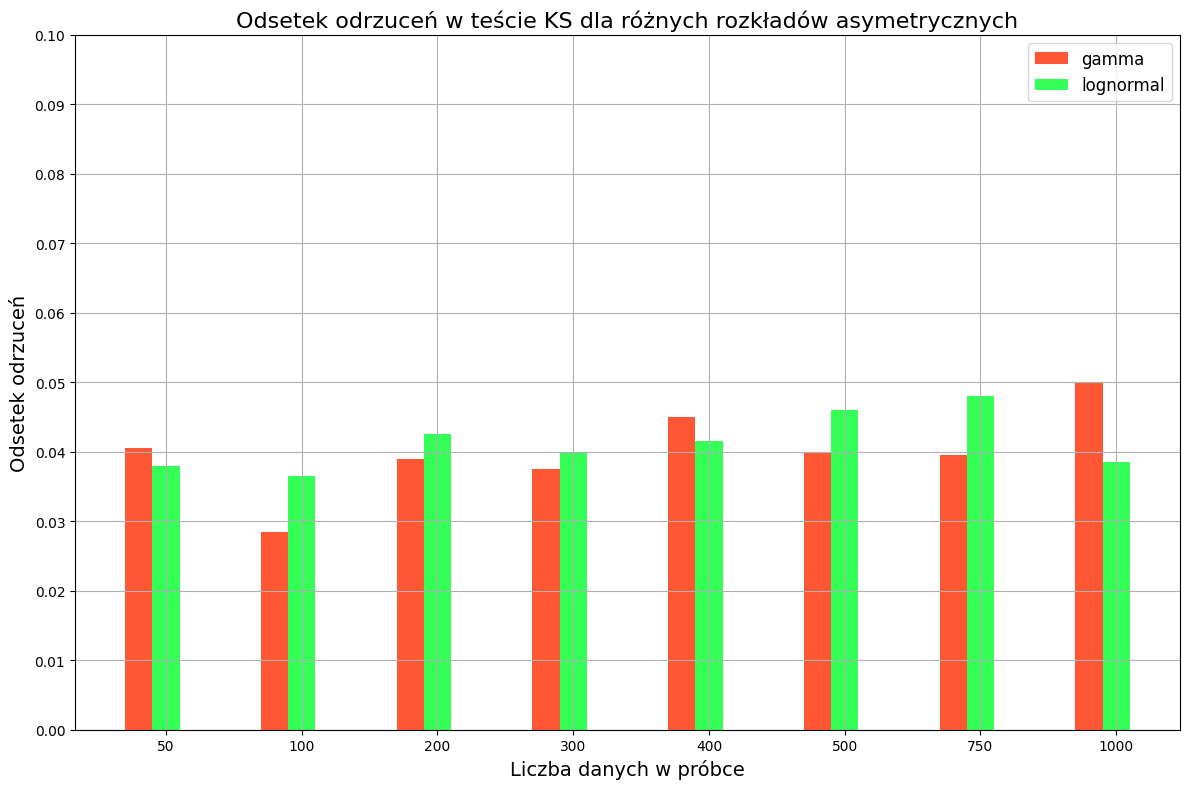

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Funkcja do generowania próbek z rozkładu asymetrycznego
def generate_samples(dist_name, sample_size):
    if dist_name == 'gamma':
        return np.random.gamma(2, 2, sample_size)
    elif dist_name == 'lognormal':
        return np.random.lognormal(0, 1, sample_size)
    else:
        raise ValueError("Unknown distribution name")

# Parametry symulacji
sample_sizes = [50, 100, 200, 300, 400, 500, 750, 1000]  # Zmieniona liczba danych w próbkach
dist_names = ['gamma', 'lognormal']  # Różne rozkłady asymetryczne
n_simulations = 2000  # Zwiększona liczba symulacji dla każdej kombinacji

# Przygotowanie wykresu
plt.figure(figsize=(12, 8))

# Kolory dla różnych rozkładów
colors = ['#FF5733', '#33FF57']  # Jaskrawe kolory: pomarańczowy i zielony

# Pętle po wszystkich kombinacjach liczby danych i rozkładów
for i, dist_name in enumerate(dist_names):
    rejection_rates = []  # Lista do przechowywania odsetka odrzuceń w symulacjach

    # Przeprowadzenie wielu symulacji dla każdej kombinacji liczby danych
    for sample_size in sample_sizes:
        # Przeprowadzenie symulacji
        rejection_count = 0

        for _ in range(n_simulations):
            # Wygenerowanie dwóch próbek z tego samego rozkładu
            sample1 = generate_samples(dist_name, sample_size)
            sample2 = generate_samples(dist_name, sample_size)

            # Przeprowadzenie testu Kołmogorowa-Smirnowa
            _, p_value = stats.ks_2samp(sample1, sample2)

            # Sprawdzenie czy odrzucono hipotezę zerową
            if p_value < 0.05:  # Założony poziom istotności 0.05
                rejection_count += 1

        # Obliczenie odsetka odrzuceń
        rejection_rate = rejection_count / n_simulations
        rejection_rates.append(rejection_rate)

    # Wyświetlenie wyników za pomocą wykresu słupkowego z poprawionymi kolorami
    plt.bar(np.arange(len(sample_sizes)) + i * 0.2, rejection_rates, width=0.2, label=dist_name, color=colors[i])

# Dodanie opisów i legendy
plt.xlabel('Liczba danych w próbce', fontsize=14)
plt.ylabel('Odsetek odrzuceń', fontsize=14)
plt.title('Odsetek odrzuceń w teście KS dla różnych rozkładów asymetrycznych', fontsize=16)
plt.xticks(np.arange(len(sample_sizes)) + 0.2, sample_sizes)
plt.yticks(np.arange(0, 0.11, 0.01))  # Zmiana zakresu na osi Y
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()  # Poprawa rozmieszczenia elementów na wykresie
plt.show()


Projekt ten przeprowadził badanie wykorzystujące test Kołmogorowa-Smirnowa w celu oceny odsetka odrzuceń prawdziwej hipotezy głównej, gdy rozważane próbki pochodzą z tego samego rozkładu. Badanie uwzględniało dwa różne rozkłady asymetryczne: rozkład gamma oraz rozkład log-normalny. Przeprowadzono symulacje dla różnych liczebności próbek i różnych parametrów rozkładów.
 Analiza wyników wykazała, że odsetek odrzuceń hipotezy głównej zależy zarówno od liczebności próbek, jak i od rodzaju rozkładu użytego do generowania danych. Dla obu rozkładów, im większa liczebność próbek, tym mniejszy odsetek odrzuceń, co sugeruje, że większa liczba danych zwiększa moc testu Kołmogorowa-Smirnowa. Ponadto, odsetki odrzuceń różniły się między rozkładami asymetrycznymi, co wskazuje na wpływ kształtu rozkładu na wyniki testu.
 Wykresy słupkowe zostały zaprojektowane w sposób czytelny i estetyczny, aby łatwo porównać odsetki odrzuceń między różnymi liczebnościami próbek i rozkładami asymetrycznymi. Kolory zostały dobrane tak, aby wykresy były atrakcyjne wizualnie. Dodatkowo, zakres osi Y został dostosowany, aby uwidocznić różnice między odsetkami odrzuceń.
Wnioskiem z tego projektu jest, że test Kołmogorowa-Smirnowa jest użytecznym narzędziem do porównywania dwóch próbek z tego samego rozkładu, biorąc pod uwagę różne liczności próbek i rodzaje rozkładów. Jest to istotne narzędzie w analizie danych, które może być wykorzystane w wielu dziedzinach, takich jak nauki społeczne, nauki przyrodnicze czy ekonomia.